In [1]:
# Importing necessary files
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy.stats import norm
from imblearn.over_sampling import SMOTE

# for models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score

# for determining model performance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

# for saving the trained model
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Creating Path variables
path_dataset = '/content/drive/MyDrive/Colab_Notebooks/accredion/Fraud.csv'
path_models = '/content/drive/MyDrive/Colab_Notebooks/accredion/model/'
path = '/content/drive/MyDrive/Colab_Notebooks/accredion/'

In [4]:
# loading the data set
table=pd.read_csv(path_dataset)

# **Initial Data Exploration**

In [5]:
# finding shape of the table that is number of rows and columns
table.shape

(6362620, 11)

In [6]:
# Checking for null values
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
table

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [8]:
# Checking for duplicate row
any(table.duplicated())

False

In [9]:
# Checking for null values
table.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# determining number of unique values in each column
table.apply(pd.Series.nunique)

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [11]:
# description of each column of the table
table.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
# we will drop isFlaggedFraud column and will use isFraud column as target column
table=table.drop(['isFlaggedFraud'],axis=1)

In [13]:
table['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [14]:
#feature mapping: Mapping the values to numerical equivalents for easy calculations
le = LabelEncoder()
table['type']=le.fit_transform(table['type'])

In [15]:
table

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [16]:
# there is no valuable information we can obtain from the name of the origin account for fraud detection. Therefore we will drop it
table=table.drop(['nameOrig'],axis=1)

In [17]:
# for destination name is usefull to determine whether it is merchants account or not. Therefore we can change it to represent that.
m=table['nameDest'].str.startswith('M')
n=table['nameDest'].str.startswith('C')
table['nameDest']=np.where(m,1,table['nameDest'])
table['nameDest']=np.where(n,0,table['nameDest'])

## **Feature Engineering**

In [18]:
# Here we will use remove columns keepind record of balance of accounts before and after transaction
#  on both origin and dest side and instead keep only the changes in the account balance on both side

table['origin']=abs(table['newbalanceOrig'] - table['oldbalanceOrg'])
table['dest']=abs(table['newbalanceDest'] - table['oldbalanceDest'])
table=table.drop(['newbalanceOrig','oldbalanceOrg','newbalanceDest','oldbalanceDest'],axis=1)

In [19]:
table

,step,type,amount,nameDest,isFraud,origin,dest
0,1,3,9839.64,1,0,9839.64,0.00
1,1,3,1864.28,1,0,1864.28,0.00
2,1,4,181.00,0,1,181.00,0.00
3,1,1,181.00,0,1,181.00,21182.00
4,1,3,11668.14,1,0,11668.14,0.00
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,0,1,339682.13,339682.13
6362616,743,4,6311409.28,0,1,6311409.28,0.00
6362617,743,1,6311409.28,0,1,6311409.28,6311409.27
6362618,743,4,850002.52,0,1,850002.52,0.00


### **Data Visulisation**

<Axes: >

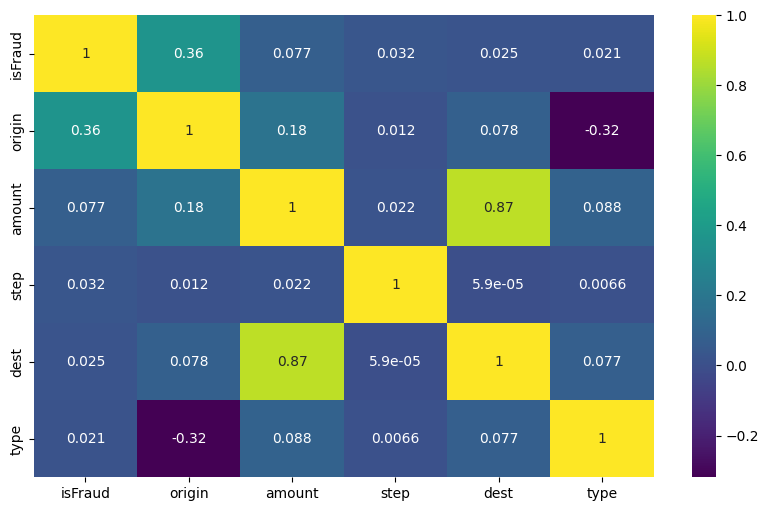

In [20]:
# Heat map to determine correlation between various features of the data set
k = 7
cols = table.corr().nlargest(k, 'isFraud')['isFraud'].index
cm = table[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

* From the above heat map plot we can conclude that correlation between all
the features of the data set is under the considerable limit.

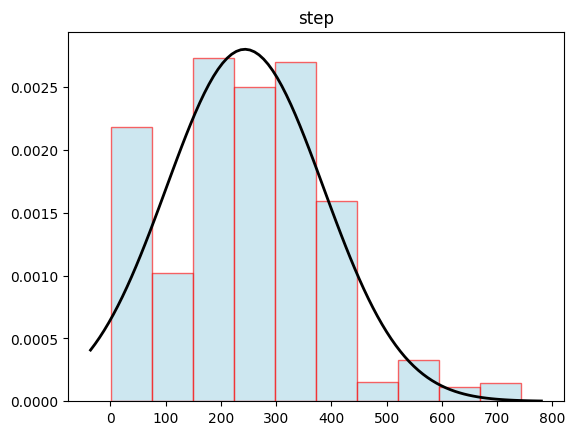

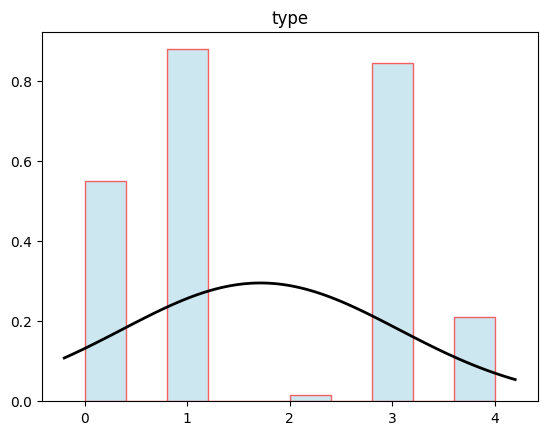

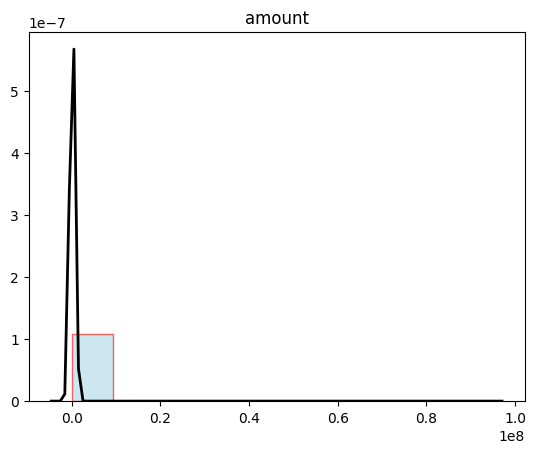

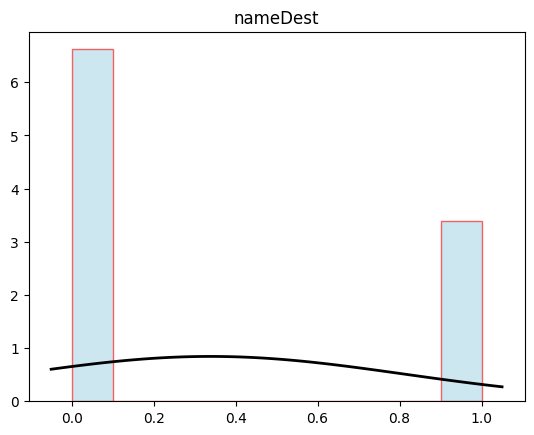

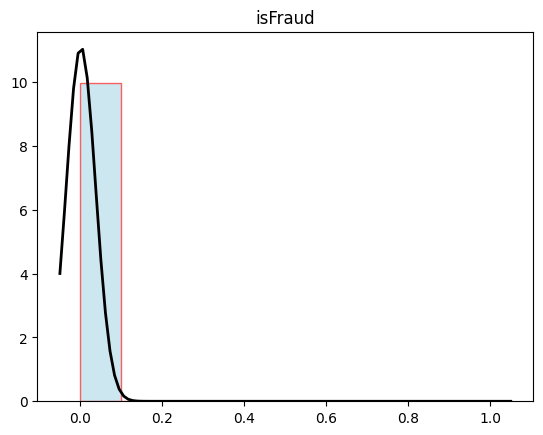

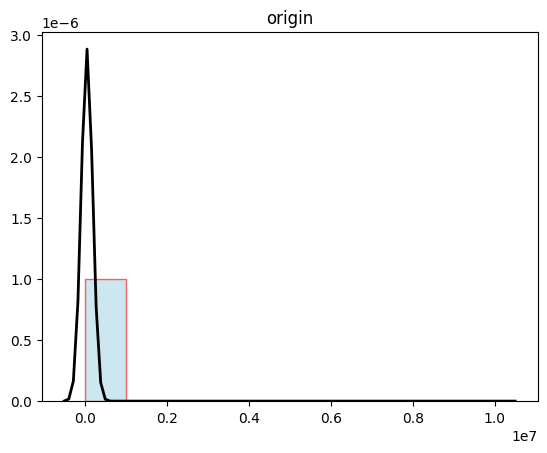

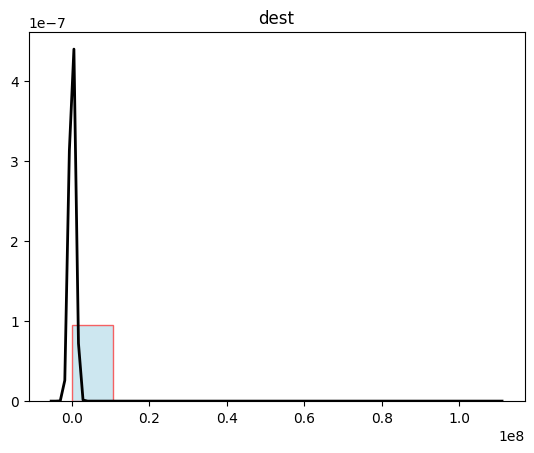

In [21]:
# Determining distribution of all the features of the table
for i in table.columns:
    mu, std = norm.fit(table[i].astype(float))
    plt.hist(table[i],density=True, alpha=0.6,color='lightblue', edgecolor = 'red')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = i.format(mu, std)
    plt.title(title)
    plt.show()

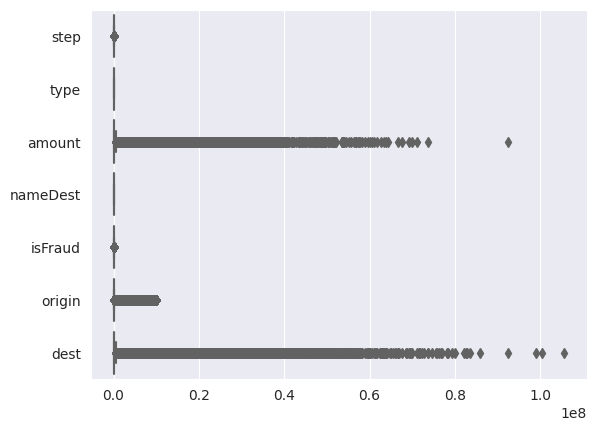

In [22]:
# Box and Whisker  plot
sns.set_style("darkgrid")
ax = sns.boxplot(data=table, orient="h", palette="Set3")

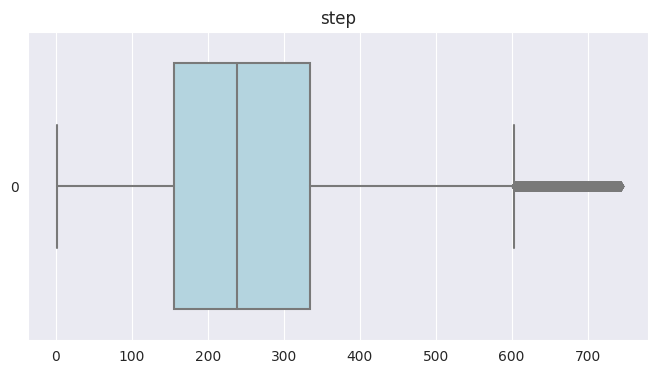

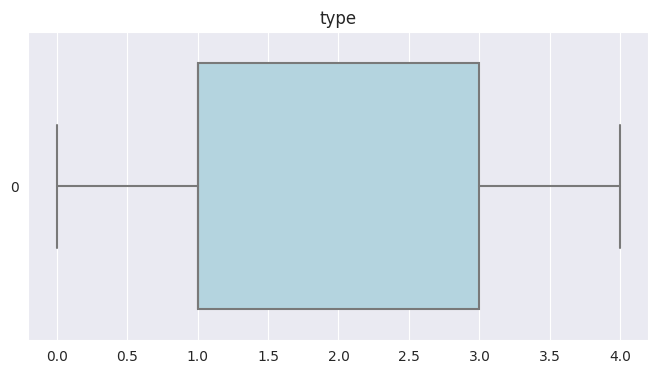

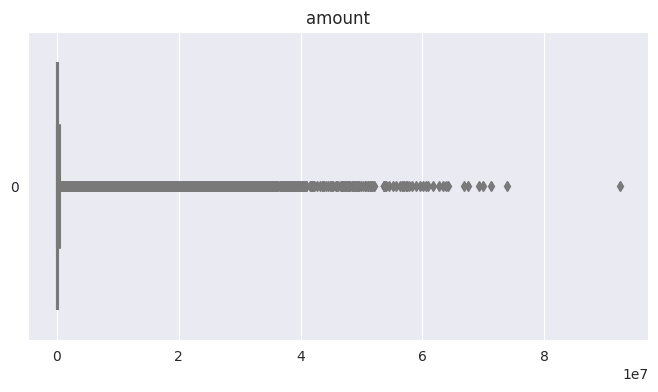

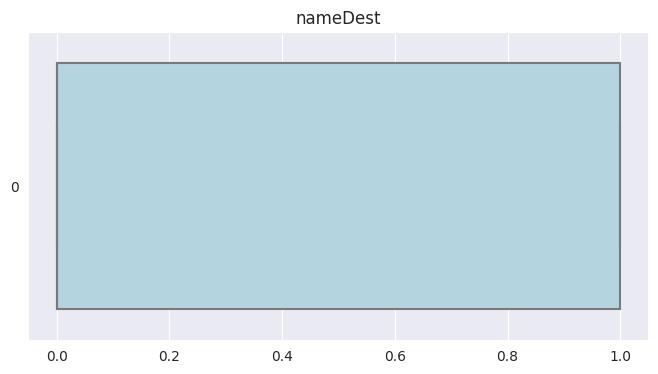

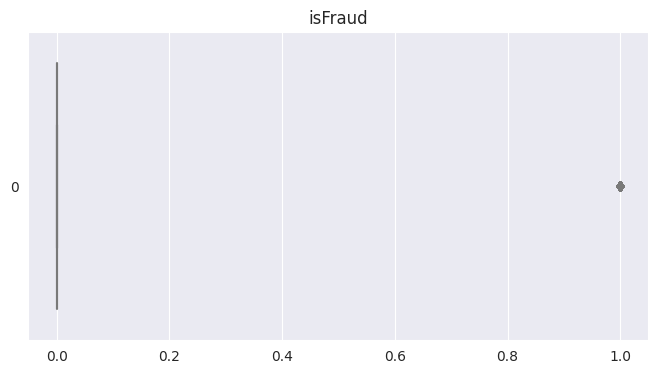

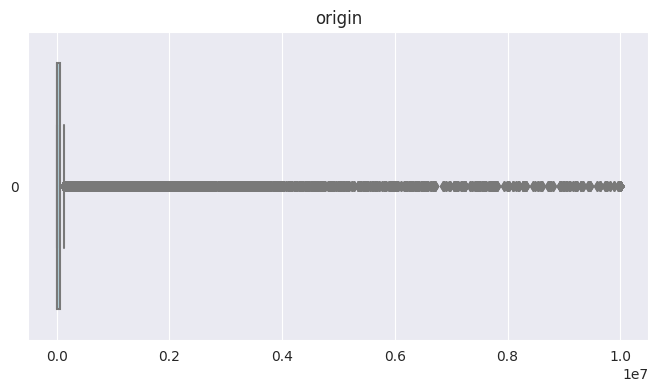

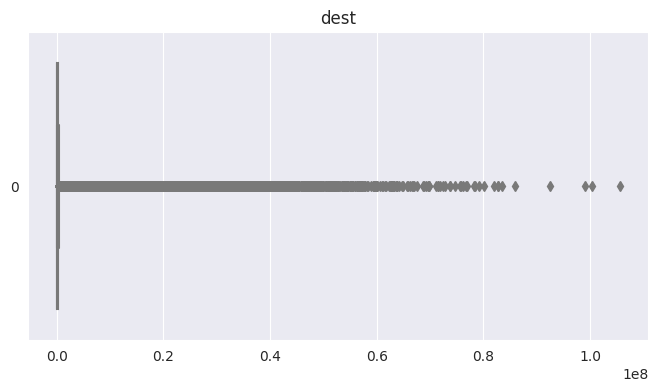

In [23]:
# column wise Box and Whisker plot
column_name = table.columns
for i in column_name:
 fig = plt.figure(figsize =(8, 4))
 plt.subplot()
 sns.set_style("darkgrid")
 ax = sns.boxplot(data=table[i],orient="h",color='lightblue')
 ax.set_title(i)
 plt.show()



*   From the above box and whisker plot we can see that there are outliers.



## **Checking for Outliers**

In [24]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.85):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [25]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
    number_of_outliers=0
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
    return number_of_outliers

In [26]:
for var in table:
    print(var, "has " , has_outliers(table, [var]),  "Outliers")

step has  0 Outliers
type has  0 Outliers
amount has  191675 Outliers
nameDest has  0 Outliers
isFraud has  8213 Outliers
origin has  218750 Outliers
dest has  224015 Outliers


In [27]:
table

,step,type,amount,nameDest,isFraud,origin,dest
0,1,3,9839.64,1,0,9839.64,0.00
1,1,3,1864.28,1,0,1864.28,0.00
2,1,4,181.00,0,1,181.00,0.00
3,1,1,181.00,0,1,181.00,21182.00
4,1,3,11668.14,1,0,11668.14,0.00
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,0,1,339682.13,339682.13
6362616,743,4,6311409.28,0,1,6311409.28,0.00
6362617,743,1,6311409.28,0,1,6311409.28,6311409.27
6362618,743,4,850002.52,0,1,850002.52,0.00




*   After analysing the outliers we realise that most of them are the fraud data sets.
*   As there are less features so we donot need to have dimensionlaity reduction




In [28]:
table['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64



*   As the number of Fraud cases is very low so we have to deal with class imbalance



## **Class Imbalance**

In [29]:
sm=SMOTE()
x = table.drop(columns=['isFraud'])
y = table['isFraud']
x,y = sm.fit_resample(x,y)

# Model Building

In [30]:
# Dividing data into test and training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [31]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [32]:
def performance(model,name):

  y_pred=model.predict(x_test)
  print("Classification Report: \n")
  print(classification_report(y_test,y_pred))

  print(name+" Accuracy Score:", accuracy_score(y_test,y_pred))

  print("\n AUC curve: \n")
  generate_auc_roc_curve(model, x_test)

In [33]:
def save_model(model,name):
  model_pkl_file = path_models +"/"+ name +".pkl"
  with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

In [34]:
if not os.path.exists(path_models):
    if os.name == 'posix':
      !mkdir -p {path_models}

**Logisitic Regression**

Classification Report: 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80   1270468
           1       0.80      0.80      0.80   1271295

    accuracy                           0.80   2541763
   macro avg       0.80      0.80      0.80   2541763
weighted avg       0.80      0.80      0.80   2541763

Logistic Regression Accuracy Score: 0.8019827182943492

 AUC curve: 



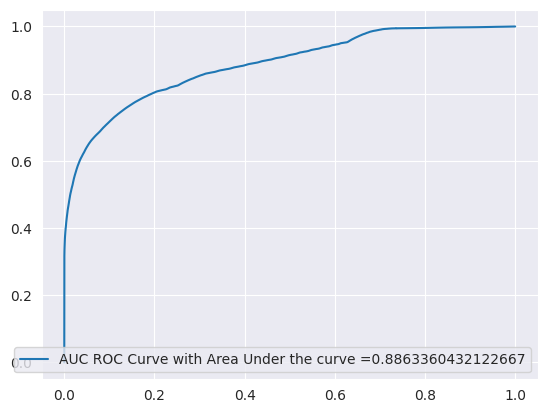

In [35]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
performance(lg,"Logistic Regression")
save_model(lg,"Logistic Regression")

**Random Forest**

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270468
           1       0.99      1.00      0.99   1271295

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763

Random Forest Accuracy Score: 0.9942594962630269

 AUC curve: 



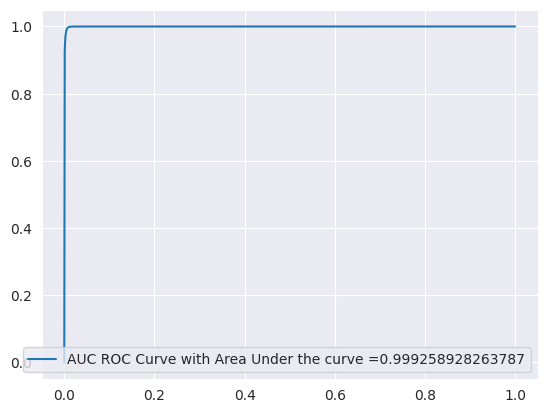

In [36]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
performance(rf,"Random Forest")
save_model(rf,"Random Forest")

**Decision Tree**

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270468
           1       0.99      1.00      0.99   1271295

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763

Decision Tree Accuracy Score: 0.993339662273784

 AUC curve: 



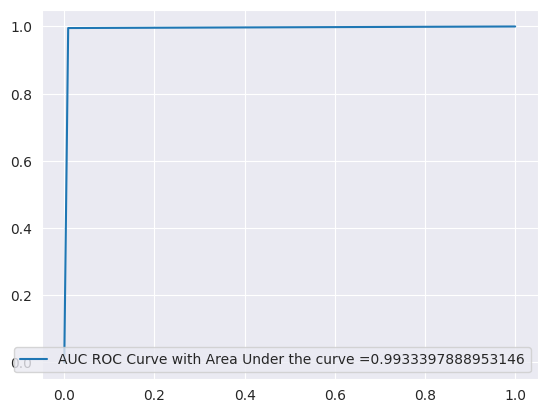

In [37]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
performance(dt,"Decision Tree")
save_model(dt,"Decision Tree")

**Gradient Boosting**

Classification Report: 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97   1270468
           1       0.96      0.98      0.97   1271295

    accuracy                           0.97   2541763
   macro avg       0.97      0.97      0.97   2541763
weighted avg       0.97      0.97      0.97   2541763

Gradient Boosting Accuracy Score: 0.9720186343101226

 AUC curve: 



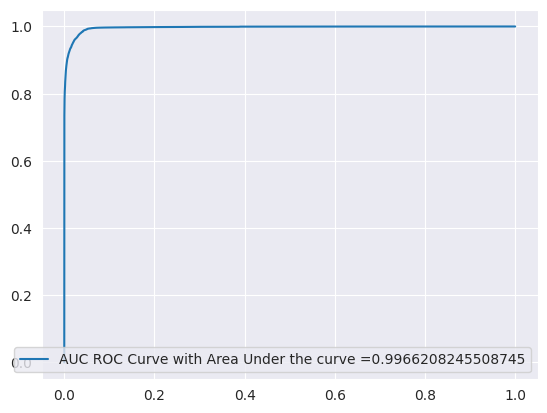

In [34]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
performance(gb,"Gradient Boosting")
save_model(gb,"Gradient Boosting")

## **Model Performance**

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1270468
           1       0.99      1.00      0.99   1271295

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763

Random Forest Accuracy Score: 0.9942677582449662

 AUC curve: 



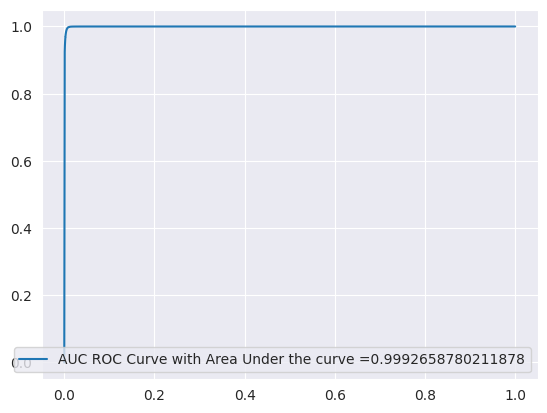

In [ ]:
model_pkl_file=path_models+"/"+"Random Forest"+".pkl"
with open(model_pkl_file, 'rb') as file:
  model = pickle.load(file)
performance(model,"Random Forest")

kfold = KFold(n_splits=5)
cv_results = cross_val_score(model, x, y, cv=5, scoring="accuracy")
msg = "%s: %f (%f)" % ("Random Forest", cv_results.mean(), cv_results.std())
print(msg)

## **Questions**

1. **Data cleaning including missing values, outliers and multi-collinearity.**

> *   After loading the data we checked for presence of null values and
blank.
> *   There were no blanks and null values.

---

2. **Describe your fraud detection model in elaboration.**

> *   This takes amount take in step, type of transaction, origin and dest amount balanace before and after transaction, whether destination is a merchant, and the amount of transaction.
> *   It predicts based on the above transaction whether transaction is a fraud or not.
> *   The model used is Random forest model. It contains number of decision tree model and takes average of their output.

---

3. **How did you select variables to be included in the model?**

> *   After analysing the data and going through data dictinary we got some idea.
> *   Origin names were irrelevant so we dropped it.
> *   Destination name as a whole was irrelevant but the it was usefull in determining if the receipient is a merchant or not. This helps prevent mis classification of data as Fraud involving merchants.
> *   old and new origin balance was changed to origin which is the difference in the balance as result of transactions. Similarly for dest, difference of old and new balance was stored in a new column.
> *   Old columns were dropped.
> *   The new columns now helps to determine frauds involving the employees or person interfering with backend data.
> *   step can be used to determine the fraud which are carried out in pieces over a period of time.

---

4. **Demonstrate the performance of the model by using best set of tools.**

> *   Here we have used accuracy score, AUC ROC curve and cross validation for showing the performance of the model.
> *   For selecting the best suitable model we have used AUC ROC and accuracy score.

---

5. **What are the key factors that predict fraudulent customer?**

> *   The amount involved in transaction. Amount should not be very large for a single transaction.
> *   Any discrepancies in the amount, balance change at origin and destination account. The amount transfered from orign should be same received by receipient.
> *   Transaction involving merchant account. In this case destination account balance before or after transaction is not displayed.
> *   Large Cash transaction.

---

6. **Do these factors make sense? If yes, How? If not, How not?**

> *   All the factors used above make sense.
> *   **Step:** To found out if a transaction is carried out over a period of time
> *   **Amount:** To find out transaction involving large amount of money
> *   **Type:** To find out transaction over different means.
> *   **Origin and dest:** To figure out discrepancies in the amount transfered, origin and dest account balance change.

---

7. **What kind of prevention should be adopted while company update its infrastructure?**

> *   They can use the backend server to just store the transaction carried out during the time main server was down. This server neednot be a large server.
> *   Later they can used the stored data to predict fraud by feeding it to model.

---

8. **Assuming these actions have been implemented, how would you determine if they work?**

> *   All of the Fraud prediction made by model should be cross verified by human. This will have dual benefit first we can get the model performance and unnecessary fraud alerts could be stop and using model human donot need to go through each transaction.
> *   Through this way there will be monitoring of model performance.

# **Link To the trained model**

https://drive.google.com/drive/folders/1uByRLCIrcQH8bLKF7D23RBaXNI3bty8m?usp=sharing